A simplified version of the game Battleship is used to train an agent using Reinforcement Learning. 

The board will consist of a single row with n columns, or squares. Only one ship is allowed and has a size of m<n squares. 

The expectation is for the agent to learn to
a) fire at intervals of m squares (because a ship has a size of m squares and one would sample the space quicker this way), and
b) fire at squares adjacent to the previous hit. 

We believe this policy minimizes the number of shots required to sink the ship. 

Once this is achieved, we will move on to more, larger ships, and a bigger board. 

Let's first develop the game engine:

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def genShipCoords(shipLen,minCoord,maxCoord):
    """Generate ship coordinates randomly such all coordinates are in the mathematical range of [minCoord,maxCoord].
    
    Example: Assuming one wants the coordinates of a ship of length 3 on a board of size 10x1, one would
    call the function: 
    ship = genShipCoords(3, 10, 1)
    # ship returns a tuple with the coorindates (e.g. (3,4,5)
    """
    
    # TODO: input validation on args
    
    # Get coords: we first get a random starting coordinate and then upon this, the rest of the coordinates 
    # are populated. 
    coordinates = [0]*shipLen #initialize 
    coordinates[0] = random.randint(minCoord,maxCoord) # return a random integer N such that a <= N <= b.
    for i in range(1,shipLen):
        if coordinates[i-1] < maxCoord:
            coordinates[i] = coordinates[i-1] + 1
        else: 
            coordinates[i] = coordinates[i-1] - 1
                          
    return tuple(coordinates)

In [2]:
HIT = "HIT"
MISS = "MISS"
SHOT_RESULT = {HIT: 1,
               MISS: -1}

class SimpleBattleship(object):
    
    # Only a one-row board is implemented for now
    def __init__(self, shipCoords, boardRows, boardCols):
        self.shipCoords = shipCoords
        self.boardSize = boardCols
        self.board = np.zeros(boardCols) 
        
    def fireShot(self, shotCoordinate):
        if shotCoordinate > self.boardSize or shotCoordinate < 1:
            raise ValueError("Out of bounds: {}".format(shotCoordinate))
        
        if shotCoordinate in self.shipCoords:
            # Hit
            self.updateState(shotCoordinate, SHOT_RESULT[HIT])
            return SHOT_RESULT[HIT]
        else:
            # Miss
            self.updateState(shotCoordinate, SHOT_RESULT[MISS])
            return SHOT_RESULT[MISS]
    def getState(self):
        return self.board
    
    def updateState(self,coord,shotResult):
        self.board[coord-1] = shotResult
    
    
#     print("Number of shots taken:{}".format(numShotsTaken))
#     print("Number of misses:{}".format(numMisses))
#     print("% of board covered to sink ship:{}".format(100*numShotsTaken/BOARD_SIZE[1]) )

Let's test the getState method in the simpleBattleShip class. 

In [3]:
# Play a game
BOARD_ROWS = 1
BOARD_COLS = 10
SHIP_LEN = 2

shipCoords = genShipCoords(SHIP_LEN, BOARD_ROWS, BOARD_COLS)
print(shipCoords)

gameTest = SimpleBattleship(shipCoords, BOARD_ROWS, BOARD_COLS) # place ship in the simple battleship game

# fire shot at this known coordinate; must return a HIT because...well, it's a known coord. 
gameTest.fireShot(shipCoords[0]) 
print(game.getState()) # the state tells us if it was miss or not. 

# TODO: 
# fire shot at this known coordinate; must return a MISS because...well, it's a known coord. 

(8, 9)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


The avg percentCovered was:73.077


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

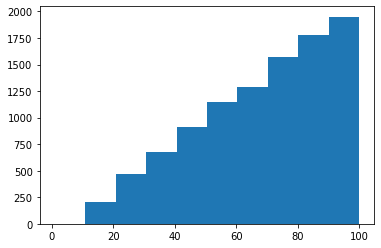

In [11]:
def randomAttacker():
    game = SimpleBattleship(shipCoords, BOARD_ROWS, BOARD_COLS)
    shotsTaken = []
    numShotsTaken = 0
    numHits = 0
    numMisses = 0
    while True:
        randomShot = random.randint(1,BOARD_COLS)
        #print(randomShot)

        if randomShot not in shotsTaken:
            numShotsTaken += 1
            shotsTaken.append(randomShot)
            
            if game.fireShot(randomShot)==SHOT_RESULT[HIT]:
                #print("HIT")
                numHits += 1
            else:
                #print("MISS")
                numMisses += 1


        if numHits == 2:
            break
    return 100*numShotsTaken/BOARD_COLS

NUM_EPISODES = 10000
percentCovered = np.empty(NUM_EPISODES, dtype=int)

for i in range(NUM_EPISODES):
    percentCovered[i] = randomAttacker()
    
print("The avg percentCovered was:{}".format(percentCovered.mean()))
## fig = plt.hist(percentCovered,normed=True,range=(1,100)); failed last time
fig = plt.hist(percentCovered,range=(1,100));
game.getState()

Now that we have a decent, simple battleship engine, let's focus on the reinforcement learning. 

The following algorithm is based on an actual Q-table. 

initialize Q[numstates,numactions] arbitrarily
observe initial state s
repeat
    select and carry out an action a
    observe reward r and new state s'
    Q[s,a] = Q[s,a] + α(r + γmaxa' Q[s',a'] - Q[s,a])
    s = s'
until terminated

In [ ]:
# #utility functions
# actionSetToStr = {-1:"LEFT",1:"RIGHT"}


# # ACTUAL TRAINING

# NUM_EPISODES = 10000
# BOARD_SIZE = (1,10)
# SHIP_SIZE = 2
# ship = genShipCoords(SHIP_SIZE, BOARD_ROWS, BOARD_COLS)
# print("SHIP LOCATION:{}".format(ship))
# attacker = SimpleBattleship(ship, BOARD_ROWS, BOARD_COLS)
# # let's assume we don't know the number of states
# Q  = {} #Q-table
# actionSet = (-1,1) #LEFT=-1, RIGHT= +1
# R = {1:1, 0:-1, 2:-100} #Reward function: +1 if HIT(1), -1 if MISS(0), -100 if INVALID(2)
# s = attacker.getState()
# crossHairCoord = 0 # agent starts w/ cross-hair at coordinate 0 
# for _ in range(2):
#     a = random.choice(actionSet)
#     print("random action is " + actionSetToStr[a])
    
#     crossHairCoord += a
#     print("crosshair moved to {}".format(crossHairCoord))

#     r = R[attacker.fireShot(randomShot)]
#     s1 = attacker.getState()
     
#     Q[s] = 1
#     print(r)
#     print(s1)


One algorithm that uses rollouts is:

initialize replay memory D
initialize action-value function Q with random weights
observe initial state s
repeat
    select an action a
        with probability ε select a random action
        otherwise select a = argmaxa’Q(s,a’)
    carry out action a
    observe reward r and new state s’
    store experience <s, a, r, s’> in replay memory D

    sample random transitions <ss, aa, rr, ss’> from replay memory D
    calculate target for each minibatch transition
        if ss’ is terminal state then tt = rr
        otherwise tt = rr + γmaxa’Q(ss’, aa’)
    train the Q network using (tt - Q(ss, aa))^2 as loss

    s = s'
until terminated